# 簡単なODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 単一緩和の減衰挙動

まず，　単一緩和の減衰運動を解いてみましょう．
$$
    \frac{{\rm d}x}{{\rm d}t} = -x
$$

In [2]:
init   = [1.0]
t_span = [0.0,5.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def decay(t,x): return -x
sol = solve_ivp(decay,t_span,init,method='RK45',t_eval=t_eval)

内部で精度を保証できるよう時間刻みを勝手に調整してくれます．嬉しいですね!

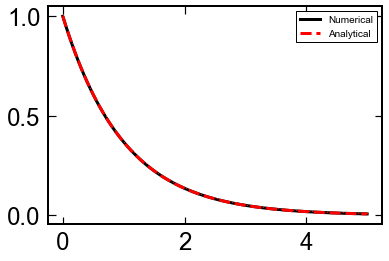

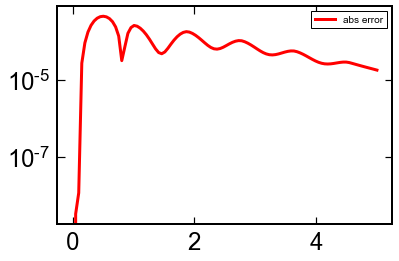

In [3]:
plt.plot(sol.t,sol.y[0,:],'k,-')
plt.plot(sol.t,np.exp(-sol.t),'r,--')
plt.legend(['Numerical','Analytical'])
plt.show()
plt.semilogy(sol.t,np.abs(sol.y[0,:]-np.exp(-sol.t)),'r')
plt.legend(['abs error'])

## 1次元調和振動子

次に，古典系での1次元調和振動子を例に挙げる．
ハミルトニアンを書き下します．
$$
    H = \frac{p^2}{2} + \frac{q^2}{2}
$$
簡単のため定数は1としました．　正準方程式から連立ODEを得ます．
$$
    \dot p = -q\\
    \dot q = p
$$
勿論，連立ODEも簡単に扱うことができます．

In [4]:
p0 = 1.0; q0 = 0.0
init   = [p0,q0]
t_span = [0.0,20.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def halmonic(t,x): 
    p,q = x
    return [-q,p]
sol = solve_ivp(halmonic,t_span,init,method='RK45',t_eval=t_eval)

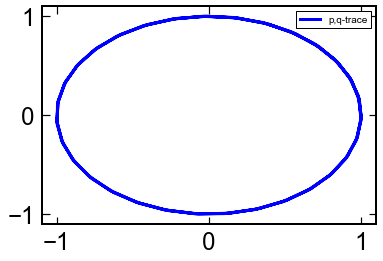

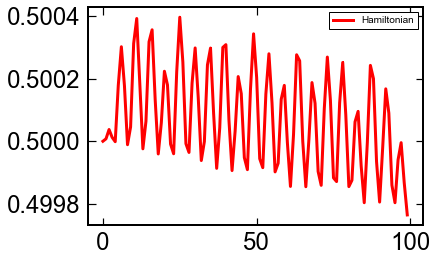

In [5]:
plt.plot(sol.y[0,:],sol.y[1,:],'b,-')
plt.legend(['p,q-trace'])
plt.show()
plt.plot(sol.y[0,:]**2/2+sol.y[1,:]**2/2,'r,-')
plt.legend(['Hamiltonian'])
plt.show()

運動方程式による表現でも同じです．
$$
    \frac{{\rm d}^2 x}{{\rm d}t^2} = -x
$$

ここで，

$$
    \frac{{\rm d} x}{{\rm d}t}  = x'\\
    \frac{{\rm d} x'}{{\rm d}t} = -x
$$

と線形化しました

In [6]:
x = 1.0; xp = 0.0
init   = [x,xp]
t_span = [0.0,20.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def EOM(t,X): 
    x,xp = X
    return [xp,-x]
sol = solve_ivp(EOM,t_span,init,method='RK45',t_eval=t_eval)

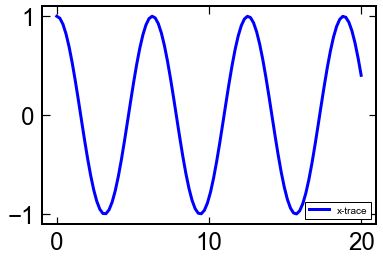

In [7]:
plt.plot(sol.t,sol.y[0,:],'b,-')
plt.legend(['x-trace'])
plt.show()